In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
#warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# Defining Strategy
## Day Trader Strategy (9-13 minute crossover)
## Swing Trader Strategy (20-100 day crossover)
## Long-term Trader Strategy (50 or 100-200 day crossover)

In [2]:
def day_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="1d", interval="5m")
    
    # Calculate moving averages
    ema9 = stock_data['Close'].ewm(span=9).mean()
    ema13 = stock_data['Close'].ewm(span=13).mean()
    #Added by Alex
    clsd = stock_data['Close']
    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    # Added by Alex
    signals['closed'] = clsd
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema9
    signals['long_ema'] = ema13
    signals.loc[9:, 'position'] = np.where(signals['short_ema'][9:] > signals['long_ema'][9:], 1, 0)
    signals.loc[13:, 'position'] = np.where(signals['short_ema'][13:] < signals['long_ema'][13:], -1, signals['position'][13:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
    # ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
    # ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema9.index, ema9, label='9 EMA')
    ax.plot(ema13.index, ema13, label='13 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()

    return signals

In [3]:
def swing_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="1y", interval="1d")
    
    # Calculate moving averages
    ema20 = stock_data['Close'].ewm(span=20).mean()
    ema100 = stock_data['Close'].ewm(span=100).mean()
    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema20
    signals['long_ema'] = ema100
    signals['position'][20:] = np.where(signals['short_ema'][20:] > signals['long_ema'][20:], 1, 0)
    signals['position'][100:] = np.where(signals['short_ema'][100:] < signals['long_ema'][100:], -1, signals['position'][100:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
    # ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
    # ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema20.index, ema20, label='20 EMA')
    ax.plot(ema100.index, ema100, label='100 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()
    
    return signals


In [4]:
def long_term_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="5y", interval="1d")
    
    # Calculate moving averages
    ema50 = stock_data['Close'].ewm(span=50).mean()
    ema100 = stock_data['Close'].ewm(span=100).mean()
    ema200 = stock_data['Close'].ewm(span=200).mean()
    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema50
    signals['medium_ema'] = ema100
    signals['long_ema'] = ema200
    signals.loc[50:, 'position'] = np.where(signals['short_ema'][50:] > signals['long_ema'][50:], 1, 0)
    signals.loc[50:, 'position'] = np.where(signals['short_ema'][50:] < signals['medium_ema'][50:], -1, signals['position'][50:])
    signals['position'][200:] = np.where(signals['short_ema'][200:] < signals['long_ema'][200:], -1, signals['position'][200:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
    # ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
    # ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema50.index, ema50, label='50 EMA')
    ax.plot(ema100.index, ema100, label='100 EMA')
    ax.plot(ema200.index, ema200, label='200 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()
    
    return signals

# Command Line Interface
## 1. Choose Strategy (Day Trader, Swing Trader, Long-term Trader)
## 2. Choose Ticker
## 3. To-do: Choose dates 

Enter the ticker symbol of the stock:  spy
Choose a strategy (1 = day trader, 2 = swing trader, 3 = long-term trader):  2


[*********************100%***********************]  1 of 1 completed


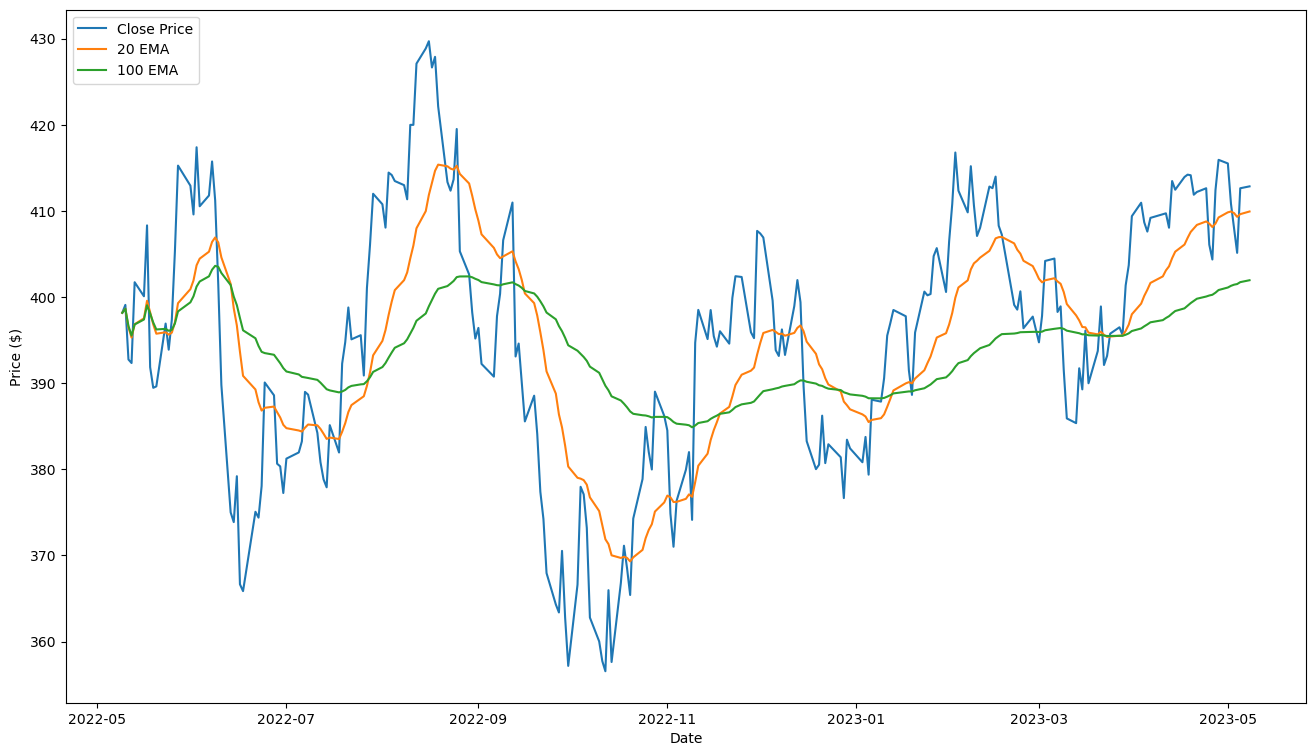

[*********************100%***********************]  1 of 1 completed
            position   short_ema    long_ema
Date                                        
2022-05-09         0  398.170013  398.170013
2022-05-10         0  398.653004  398.634605
2022-05-11         0  396.485457  396.633710
2022-05-12         0  395.288726  395.527866
2022-05-13         0  396.844397  396.816320
...              ...         ...         ...
2023-05-02         1  409.930914  401.301354
2023-05-03         1  409.748921  401.435336
2023-05-04         1  409.309024  401.509004
2023-05-05         1  409.625308  401.730716
2023-05-08         1  409.932422  401.952363

[251 rows x 3 columns]

Backtesting Results:
                    stock       holdings           cash         total  \
Date                                                                    
2022-05-09       0.000000       0.000000   10000.000000  10000.000000   
2022-05-10       0.000000       0.000000   10000.000000  10000.000000   
2022-05-

In [5]:
# Ask user for input
ticker = input("Enter the ticker symbol of the stock: ")
strategy_choice = input("Choose a strategy (1 = day trader, 2 = swing trader, 3 = long-term trader): ")

# Backtesting function
def backtest(signals, stock_data, initial_capital=10000):
    positions = pd.DataFrame(index=signals.index).fillna(0)
    positions['stock'] = signals['position'] * stock_data['Close']
    portfolio = positions.multiply(stock_data['Close'], axis=0)
    pos_diff = positions.diff()
    portfolio['holdings'] = (positions.multiply(stock_data['Close'], axis=0)).sum(axis=1)
    portfolio['cash'] = initial_capital - (pos_diff.multiply(stock_data['Close'], axis=0)).sum(axis=1).cumsum()
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    portfolio['returns'] = portfolio['total'].pct_change()
    return portfolio

# Execute the chosen EMA crossover strategy and plot the results
if strategy_choice == "1":
    signals = day_trader_strategy(ticker)
    stock_data = yf.download(ticker, period="1d", interval="5m")
elif strategy_choice == "2":
    signals = swing_trader_strategy(ticker)
    stock_data = yf.download(ticker, period="1y", interval="1d")
elif strategy_choice == "3":
    signals = long_term_trader_strategy(ticker)
    stock_data = yf.download(ticker, period="5y", interval="1d")
else:
    print("Invalid strategy choice.")
    stock_data = None
    
# Perform backtesting and print the results
if stock_data is not None:
    print(signals)
    portfolio = backtest(signals, stock_data)
    print("\nBacktesting Results:")
    print(portfolio)
    
# Re-enable SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'

# II. EXECUTING STRATEGY
## Identify when the long-term and short-term moving averages cross and define as a buy or sell opportunity

Inputs: Moving average dataframe
Outputs: Prices at crossovers and identifying buy versus sell, plot of buy/sell signals


In [6]:
# Entry Price for buying is when 5 minutes prices or closing prices cross over from 0 to 1
# Exit price for selling is when it goes from 0 or 1 to -1

In [7]:
# signals_test_df = signals

You can use the signals_test_df to test your function

In [8]:
 # Function to create a dataframe 

# def buy_sell_opportunity(moving_avg_df):
    
#     moving_avg_df['Buy_Sell'] = np.where(moving_avg_df['position'] == 1, 'Buy', 
#                                            np.where(moving_avg_df['position'] == -1, 'Sell or Out of Position', 'No Position'))
    
#     # Create columns to output for user
#     # moving_avg_df['entry_price'] = 
#     # moving_avg_df['Exit_Price'] = 
    
#     moving_avg_df = moving_avg_df[['Buy_Sell']]
    
#     return moving_avg_df

In [9]:
# # Calling the function

# buy_sell_opportunity(moving_avg_df = signals)

In [10]:
# # Call the function you just created! Using the signals dataset that was created abov
# stock_data_test = stock_data
# stock_data_test['profit_loss'] = (stock_data_test['Close'] - stock_data_test['Open']) * stock_data_test['Volume']
# stock_data_test['profit_loss_ind'] = np.where(stock_data_test['profit_loss'] > 0, 'Profit', 'Loss')
# stock_data_test

# III. CALCULATING PROFITABILITY
## Calculating the profitability of the strategy within the given time frame
Thoughts: price comparisons begin on date of first trigger


Inputs: Moving average dataframe
Outputs: Prices at crossovers and identifying buy versus sell, plot of buy/sell signals

In [11]:
# stock_data

In [12]:
 signals

,position,short_ema,long_ema
Date,,,
2022-05-09,0,398.170013,398.170013
2022-05-10,0,398.653004,398.634605
2022-05-11,0,396.485457,396.633710
2022-05-12,0,395.288726,395.527866
2022-05-13,0,396.844397,396.816320
...,...,...,...
2023-05-02,1,409.930914,401.301354
2023-05-03,1,409.748921,401.435336
2023-05-04,1,409.309024,401.509004


In [13]:
signals.drop(columns=['short_ema','long_ema',], inplace=True, axis=1)

In [14]:
signals_next = signals.shift(-1)

In [15]:
signals_next

,position
Date,
2022-05-09,0.0
2022-05-10,0.0
2022-05-11,0.0
2022-05-12,0.0
2022-05-13,0.0
...,...
2023-05-02,1.0
2023-05-03,1.0
2023-05-04,1.0


In [16]:
signals_next.rename(columns={'position':'position_next'}, inplace=True)

In [17]:
signals_next.rename(columns={'closed':'closed_next'}, inplace=True)

In [18]:
signals_merged = pd.merge(left=signals,right=signals_next,left_on='Datetime',right_on='Datetime')

KeyError: 'Datetime'

In [ ]:
signals_merged.tail(50)

In [ ]:
filtered_signals_merged = signals_merged[signals_merged['position'] != signals_merged['position_next']]

In [ ]:
filtered_signals_merged.reset_index(inplace=True)

In [ ]:
filtered_signals_merged

In [ ]:
filtered_signals_merged['row_num']= np.arange(len(filtered_signals_merged))+1

In [ ]:
filtered_signals_merged

In [ ]:
pnl = pd.merge(left=filtered_signals_merged,right=filtered_signals_merged,right_index=True,left_on="row_num")

In [ ]:
pnl

In [ ]:
pnl = pnl[pnl.row_num%2==1]

In [ ]:
pnl.drop(columns=['row_num','position_x','closed_x','position_next_x','row_num_x','position_y','closed_y','position_next_y','row_num_y'], inplace=True, axis=1)

In [ ]:
pnl

In [ ]:
pnl.rename(columns={'Datetime_x':'entry_time'}, inplace=True)

In [ ]:
pnl.rename(columns={'closed_next_x':'entry_price'}, inplace=True)

In [ ]:
pnl.rename(columns={'Datetime_y':'exit_time'}, inplace=True)

In [ ]:
pnl.rename(columns={'closed_next_y':'exit_price'}, inplace=True)

In [ ]:
stats = pnl

In [ ]:
stats

In [ ]:
# Function to create a dataframe 

# def buy_sell_opportunity(moving_avg_df):
    
    
    
#     return moving_avg_df